<a href="https://colab.research.google.com/github/kb107/CNN-Architectures/blob/main/LeNet-5/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
import sklearn
import pandas as pd
import seaborn as sns

In [52]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
X_train.shape

(60000, 28, 28)

In [54]:
X_train = tf.expand_dims(X_train, axis=3)
X_test = tf.expand_dims(X_test, axis=3)
X_train.shape

TensorShape([60000, 28, 28, 1])

In [55]:
X_train = X_train / 255
X_test = X_test / 255

In [56]:
X_valid = X_train[:6000]
y_valid = y_train[:6000]
X_train = X_train[6000:]
y_train = y_train[6000:]
X_valid.shape

TensorShape([6000, 28, 28, 1])

In [57]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [58]:
y_valid.shape

(6000, 10)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

model = Sequential([Conv2D(filters=6, kernel_size=5, strides=1, 
                           padding='same', activation='tanh',
                           input_shape=X_train[0].shape),
                    
                    AveragePooling2D(pool_size=2, strides=2),
                    
                    Conv2D(filters=16, kernel_size=5, strides=1, 
                           activation='tanh'),
                    
                    AveragePooling2D(pool_size=2, strides=2),
                    
                    Conv2D(filters=120, kernel_size=5, strides=1, 
                           activation='tanh'),
                    
                    Flatten(),

                    Dense(units=120, activation='tanh'),

                    Dense(units=84, activation='tanh'),

                    Dense(units=10, activation='softmax')
                    ])

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

In [62]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=50, callbacks=[early_stop])

Epoch 1/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.2598 - accuracy: 0.9212 - val_loss: 0.1199 - val_accuracy: 0.9645
Epoch 2/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.1097 - accuracy: 0.9663 - val_loss: 0.0895 - val_accuracy: 0.9728
Epoch 3/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0754 - accuracy: 0.9767 - val_loss: 0.0819 - val_accuracy: 0.9763
Epoch 4/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0796 - val_accuracy: 0.9755
Epoch 5/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0624 - val_accuracy: 0.9823
Epoch 6/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 7/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0625 -

In [64]:
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.259850,0.921185,0.119949,0.964500
1,0.109744,0.966296,0.089528,0.972833
2,0.075415,0.976722,0.081908,0.976333
3,0.058893,0.981019,0.079644,0.975500
4,0.046689,0.985148,0.062360,0.982333


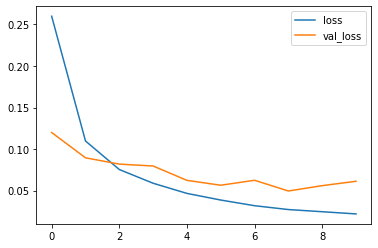

In [65]:
losses[['loss', 'val_loss']].plot()

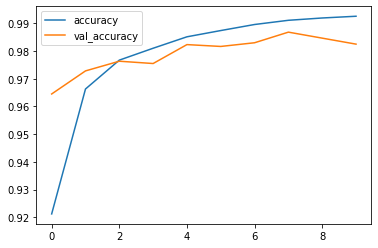

In [66]:
losses[['accuracy', 'val_accuracy']].plot()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
classes=to_categorical(np.argmax(predictions,axis=1))
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



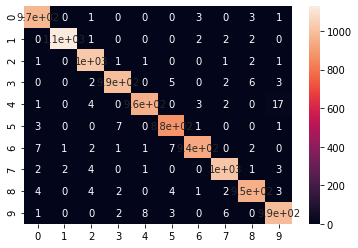

In [82]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), classes.argmax(axis=1)), annot=True)